In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#Spatial Aggregation

In [31]:
#Question 1

df=pd.read_csv('Data.csv')
mean_pm=df.groupby('state')['PM2.5'].mean()
state_with_highest_mean=mean_pm.idxmax()
print("State with highest average PM2.5:",state_with_highest_mean)

State with highest average PM2.5: Delhi


In [32]:
#Question 2

mask=df['PM2.5']>300
new_df=df[mask]
counted_df=new_df["state"].value_counts()
state1=counted_df.idxmax()
print("State with the most days with hazardous PM2.5 levels:",state1)

State with the most days with hazardous PM2.5 levels: Delhi


In [33]:
#Question 3

std_dev=df.groupby('state')['PM2.5'].std()
state_with_highest_variability=std_dev.idxmax()
print('State with the highest variability in PM2.5 levels:',state_with_highest_variability)

State with the highest variability in PM2.5 levels: Delhi


In [34]:
#Question 4

df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['year'] = df['Timestamp'].dt.year
covid_df=df[df['year'].isin([2020,2021])]
grouped_df=covid_df.groupby('state')['PM2.5'].mean()
state=grouped_df.idxmin()
print("State with the lowest average PM2.5 levels during the Covid period:",state)

State with the lowest average PM2.5 levels during the Covid period: Mizoram


In [ ]:
#Temporal Aggregation

In [ ]:
#question 1
import pandas as pd
df=pd.read_csv('Data.csv')
print(df)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
aug_2020=df[(df["Timestamp"].dt.year==2020)&(df["Timestamp"].dt.month==8)]
max_pm25_row=aug_2020.loc[aug_2020["PM2.5"].idxmax()]
print("Station with highest PM2.5 in August 2020:", max_pm25_row["station"])
print("PM2.5 value:", max_pm25_row["PM2.5"])

In [ ]:
#question 2

import pandas as pd

data = pd.read_csv('Data.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
station_data = data[(data['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB') & (data['Timestamp'].dt.year == 2018)]
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    return 'Unknown'

station_data['Season'] = station_data['Timestamp'].dt.month.apply(get_season)
season_avg_pm25 = station_data.groupby('Season')['PM2.5'].mean()
highest_pollution_season = season_avg_pm25.idxmax()
highest_pollution_value = season_avg_pm25.max()

print("Average PM2.5 Concentration by Season:")
print(season_avg_pm25)
print(f"\nSeason with the highest pollution: {highest_pollution_season} with an average PM2.5 concentration of {highest_pollution_value:.2f}")

In [ ]:
#question 3
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data.csv')
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df_2021 = df[df["Timestamp"].dt.year == 2021]
station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_2021_station = df_2021[df_2021["station"] == station_name]
df_2021_station = df_2021_station.dropna(subset=["PM2.5"])
df_2021_station["DayOfWeek"] = df_2021_station["Timestamp"].dt.dayofweek
df_2021_station["Weekend"] = df_2021_station["DayOfWeek"] >= 5
df_2021_station["Month"] = df_2021_station["Timestamp"].dt.month

monthly_avg_weekdays = df_2021_station[df_2021_station["Weekend"] == False].groupby("Month")["PM2.5"].mean()
monthly_avg_weekends = df_2021_station[df_2021_station["Weekend"] == True].groupby("Month")["PM2.5"].mean()
months = range(1, 13)
monthly_avg_weekdays = monthly_avg_weekdays.reindex(months, fill_value=0)
monthly_avg_weekends = monthly_avg_weekends.reindex(months, fill_value=0)

plt.figure(figsize=(10, 5))
plt.plot(months, monthly_avg_weekdays, marker='o', linestyle='-', label='Weekdays', color='blue')
plt.plot(months, monthly_avg_weekends, marker='s', linestyle='-', label='Weekends', color='red')
plt.xlabel("Month")
plt.ylabel("Average PM2.5")
plt.title("Monthly Average PM2.5 Levels (Weekdays vs. Weekends) in 2021")
plt.xticks(months, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
#Spatial-temporal aggregation

#Question 1

df=pd.read_csv("Data.csv")
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
df["year"] = df["Timestamp"].dt.year
df['month'] = df["Timestamp"].dt.month
df_2022=df[df['year']== 2022]

sm=[3,4,5]
mm=[6,7,8,9]
sm_avg = df_2022[df_2022["month"].isin(sm)].groupby("state")["PM2.5"].mean()
mm_avg = df_2022[df_2022["month"].isin(mm)].groupby("state")["PM2.5"].mean()

percentage_change = ((mm_avg - sm_avg) / sm_avg) * 100

most_difference_state = percentage_change.abs().idxmax()
most_difference_value = percentage_change[most_difference_state]

print("Percentage Change in PM2.5 Levels (Monsoon vs. Summer) for 2022:")
print(percentage_change)

print(f"\nState with the Most Difference: {most_difference_state} ({most_difference_value:.2f}%)")



In [ ]:
#Question 2

def categorize_season(month):
    if month in [12, 1, 2]: 
        return "Winter"
    elif month in [3, 4, 5]: 
        return "Summer"
    elif month in [6, 7, 8, 9]: 
        return "Monsoon"
    else:
        return "Excluded" 


df = pd.read_csv("Data.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df['year'] = df["Timestamp"].dt.year
df['month'] = df["Timestamp"].dt.month
df_delhi = df[df['state']=='Delhi']
df_delhi = df_delhi[(df_delhi['year'] >= 2017) & (df_delhi['year'] <= 2023)]
df_delhi["season"] = df_delhi["month"].apply(categorize_season)

savg = df_delhi.groupby(["year", "season"])["PM2.5"].mean().unstack()

fig,ax = plt.subplots(figsize = (10,8))
ax.plot(savg.index, savg["Winter"], marker="o", label="Winter", color="blue")
ax.plot(savg.index, savg["Summer"], marker="s", label="Summer", color="orange")
ax.plot(savg.index, savg["Monsoon"], marker="^", label="Monsoon", color="green")

ax.set_title("Seasonal Variation of PM2.5 Levels in Delhi (2017-2023)")
ax.set_xlabel("Year")
ax.set_ylabel("Average PM2.5 Level (µg/m³)")

ax.legend(title="Season")

ax.grid(True, linestyle="--")

plt.show()

# Winter PM2.5 levels are the highest (due to low temperatures, stagnant air, and increased emissions).
# Summer has moderate pollution (dust storms but better dispersion).
# Monsoon shows the lowest PM2.5 levels (rain cleans the air).

In [ ]:
#Question 3

df = pd.read_csv("Data.csv", parse_dates=["Timestamp"])
df["year"] = df["Timestamp"].dt.year

df_delhi = df[(df["year"] >= 2015) & (df["year"] <= 2023) & df["state"].isin(["Delhi"])]
delhi_avg = df_delhi.groupby(["year", "state"])["PM2.5"].mean().unstack()
delhi_std = df_delhi.groupby("state")["PM2.5"].std()

df_mumbai = df[(df["year"] >= 2015) & (df["year"] <= 2023) & df["city"].isin(["Mumbai"])]
mumbai_avg = df_mumbai.groupby(["year", "city"])["PM2.5"].mean().unstack()
mumbai_std = df_mumbai.groupby("city")["PM2.5"].std()

# Plot using fig, ax
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(delhi_avg.index, delhi_avg["Delhi"], marker="o", label="Delhi", color="r")
ax.plot(mumbai_avg.index, mumbai_avg["Mumbai"], marker="s", label="Mumbai", color="b")

# Labels and title
ax.set_title("PM2.5 Levels in Delhi vs Mumbai (2015-2023)")
ax.set_xlabel("Year")
ax.set_ylabel("Average PM2.5 Level (µg/m³)")

# Adding legend
ax.legend()

# Adding grid
ax.grid(True, linestyle="--")

# Show the plot
plt.show()

# Print fluctuation analysis
print("Standard Deviation (PM2.5 Fluctuations):")
print(delhi_std)
print(mumbai_std)

# Fluctuation implies how much the values vary over time.
# Here the best way to measure the fluctuation is using standard deviation.
# Since its quantifies how much values deviate from their average PM2.5


In [35]:
#Population Based

In [50]:
#Question 1

df_state_data = pd.read_csv('State_data.csv')
df_stations = df.groupby('state')['station'].nunique().reset_index()
df_stations.columns = ['State' , 'count of stations']
df_merged = df_stations.merge(df_state_data, on = 'State')
df_merged['Stations per capita'] = df_merged['count of stations'] / df_merged['Population']
state_ = df_merged.loc[df_merged['Stations per capita'].idxmax(),'State']
print("State with the highest number of monitoring stations relative to its population:", state_)

State with the highest number of monitoring stations relative to its population: Chandigarh


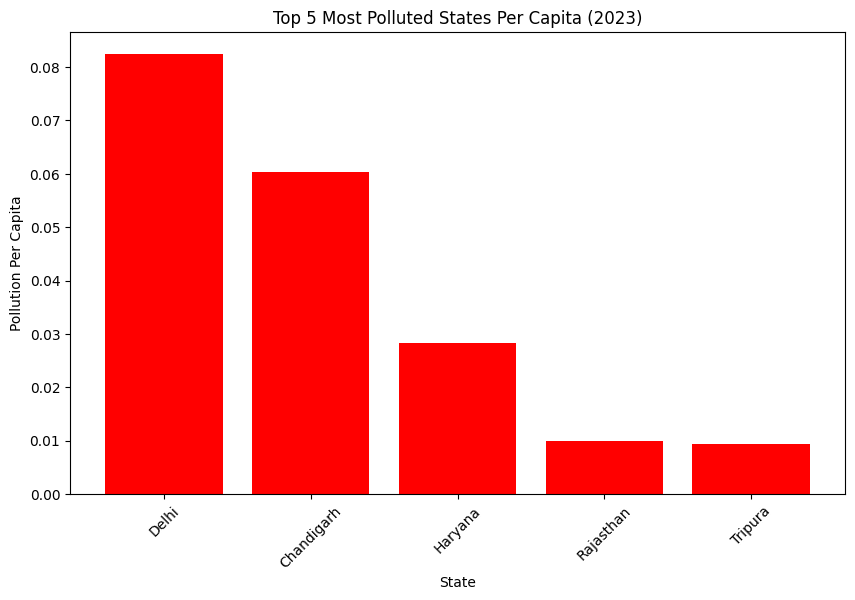

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
1229151,2023-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1229152,2023-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
1229153,2023-01-01,"Adarsh Nagar, Jaipur - RSPCB",52.502842,85.579053,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
1229154,2023-01-01,"Airoli, Navi Mumbai - MPCB",NaN,NaN,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
1229155,2023-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1433911,2023-12-31,"Worli, Mumbai - MPCB",47.100625,136.581481,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1433912,2023-12-31,"Yamunapuram, Bulandshahr - UPPCB",67.694737,127.273684,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1433913,2023-12-31,"Yerramukkapalli, Kadapa - APPCB",NaN,NaN,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1433914,2023-12-31,"Zero Point GICI, Gangtok - SSPCB",10.938437,25.018125,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [63]:
#Question 2

df=pd.read_csv('Data.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df[df['Timestamp'].dt.year == 2023]

# Aggregate total pollution per state
state_pollution = df.groupby('state')['PM2.5'].sum().reset_index()
df_state_data.columns= ['state','Population','Area (km2)']
# Merge with population data
df_merged = pd.merge(state_pollution, df_state_data, on='state')

# Calculate per capita pollution
df_merged['Pollution_Per_Capita'] = df_merged['PM2.5'] / df_merged['Population']

# Get top 5 most polluted states per capita
top_5_states = df_merged.nlargest(5, 'Pollution_Per_Capita')

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_states['state'], top_5_states['Pollution_Per_Capita'], color='red')
plt.xlabel('State')
plt.ylabel('Pollution Per Capita')
plt.title('Top 5 Most Polluted States Per Capita (2023)')
plt.xticks(rotation=45)
plt.show()
display(df)

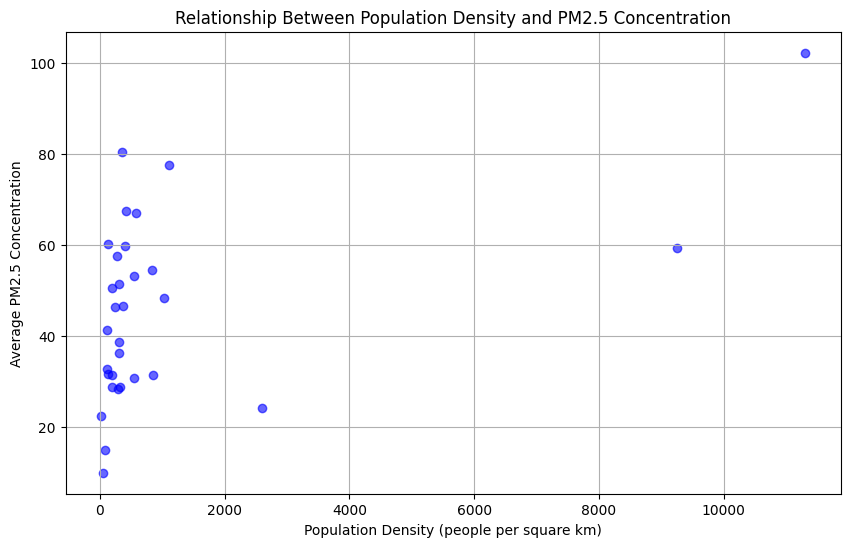

In [ ]:
#question 3

state_pollution = df.groupby('state')['PM2.5'].mean().reset_index()
state_pollution.rename(columns={'PM2.5': 'Avg_PM2.5'}, inplace=True)
df_state_data.columns= ['state','Population','Area (km2)']
# Merge with population data
df_merged = pd.merge(state_pollution, df_state_data, on='state')

# Calculate population density
df_merged['Population_Density'] = df_merged['Population'] / df_merged['Area (km2)']

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Population_Density'], df_merged['Avg_PM2.5'], color='blue', alpha=0.6)
plt.xlabel('Population Density (people per square km)')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Relationship Between Population Density and PM2.5 Concentration')
plt.grid(True)
plt.show()


In [54]:
#The plot shows a non-linear relation between the population density and PM2.5 concentration. In some states with low population density shows high pollution while some highly
# populated states shows high pollution also

In [ ]:
#Area Based

In [ ]:
#Question 1
import pandas as pd
import matplotlib.pyplot as plt

df_pollution = pd.read_csv('Data.csv')
df_states = pd.read_csv('State_data.csv') 

df_pollution["Timestamp"] = pd.to_datetime(df_pollution["Timestamp"])
df_pollution = df_pollution.dropna(subset=["PM2.5"])
state_pm25 = df_pollution.groupby("state")["PM2.5"].sum().reset_index()
df_states = df_states.rename(columns={"State": "state"})
df_combined = pd.merge(state_pm25, df_states, on="state")

df_combined["PM2.5 per km²"] = df_combined["PM2.5"] / df_combined["Area (km2)"]
df_combined = df_combined.sort_values(by="PM2.5 per km²", ascending=False)
highest_state = df_combined.iloc[0]

plt.figure(figsize=(12, 6))
plt.bar(df_combined["state"], df_combined["PM2.5 per km²"], color='blue')
plt.xlabel("State", fontsize=12)
plt.ylabel("PM2.5 Concentration per km²", fontsize=12)
plt.title("PM2.5 Concentration per Square Kilometer by State", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.text(0, highest_state["PM2.5 per km²"], f"Highest: {highest_state['state']}", fontsize=12, color="red")

plt.show()
print(f"The state with the highest PM2.5 concentration per km² is {highest_state['state']} with {highest_state['PM2.5 per km²']:.2f}.")

In [ ]:
#question 2
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Data.csv')
state_data = pd.read_csv('State_data.csv')
station_count = data.groupby('state')['station'].nunique()
state_area = state_data.set_index('State')['Area (km2)']
stations_density = station_count / state_area
highest_density_state = stations_density.idxmax()

stations_density.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Monitoring Stations Density per Square Kilometer by State')
plt.xlabel('State')
plt.ylabel('Stations per km²')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(f"The state with the highest monitoring stations density is: {highest_density_state}")


In [ ]:
#Question 3
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Data.csv')
state_data = pd.read_csv('State_data.csv')


data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data_2021 = data[(data['state'].isin(['Maharashtra', 'Madhya Pradesh'])) & (data['Timestamp'].dt.year == 2021)]
avg_pm25 = data_2021.groupby('state')['PM2.5'].mean()
pop_density = {
    'Maharashtra': state_data[state_data['State'] == 'Maharashtra']['Population'].values[0] / state_data[state_data['State'] == 'Maharashtra']['Area (km2)'].values[0],
    'Madhya Pradesh': state_data[state_data['State'] == 'Madhya Pradesh']['Population'].values[0] / state_data[state_data['State'] == 'Madhya Pradesh']['Area (km2)'].values[0]
}

pm25_density_comparison = pd.DataFrame({
    'Average PM2.5 (2021)': avg_pm25,
    'Population Density (per km²)': [pop_density['Maharashtra'], pop_density['Madhya Pradesh']]
}, index=['Maharashtra', 'Madhya Pradesh'])

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_xlabel('State')
ax1.set_ylabel('Average PM2.5 (µg/m³)', color='tab:red')
ax1.bar(pm25_density_comparison.index, pm25_density_comparison['Average PM2.5 (2021)'], color='tab:red', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:red')
ax2 = ax1.twinx()
ax2.set_ylabel('Population Density (per km²)', color='tab:blue')
ax2.plot(pm25_density_comparison.index, pm25_density_comparison['Population Density (per km²)'], color='tab:blue', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:blue')
plt.title('Comparison of PM2.5 Levels and Population Density (2021) in Maharashtra and Madhya Pradesh')
fig.tight_layout()
plt.show()

print(pm25_density_comparison)

In [ ]:
# Funding Based

#Question 1

df = pd.read_csv("Data.csv", parse_dates=["Timestamp"])
ncap = pd.read_csv("NCAP_Funding.csv")
df["year"] = df["Timestamp"].dt.year
df_2021 = df[df["year"] == 2021].copy()

# Get states that received NCAP funding
funded_states = ncap["State"].unique()
df_2021["NCAP_Funded"] = df_2021["state"].apply(lambda x: "Funded" if x in funded_states else "Not Funded")
avg_pm25 = df_2021.groupby("NCAP_Funded")["PM2.5"].mean()

# Print results
print("Average PM2.5 levels in 2021:")
print(avg_pm25)

# Plot comparison
fig, ax = plt.subplots(figsize=(10, 8))
avg_pm25.plot(kind="bar", color=["b", "r"], ax=ax)

ax.set_title("PM2.5 Levels: NCAP Funded vs. Non-Funded States (2021)")
ax.set_ylabel("Average PM2.5 (µg/m³)")
ax.set_xlabel("Funding Category")

plt.show()

In [ ]:
#Question 2

df = pd.read_csv("Data.csv", parse_dates=["Timestamp"])
ncap = pd.read_csv("NCAP_Funding.csv")

# Extract Assam's data
df_assam = df[df["state"] == "Assam"].copy()
df_assam["year"] = df_assam["Timestamp"].dt.year

# Compute average PM2.5 levels per year
pm25_trend = df_assam.groupby("year")["PM2.5"].mean()

# Extract NCAP funding for Assam
ncap_assam = ncap[ncap["State"] == "Assam"].set_index("State")

# Convert funding values to numeric and fill missing values with 0
ncap_assam["Amount released during FY 2019-20"] = pd.to_numeric(ncap_assam["Amount released during FY 2019-20"], errors="coerce").fillna(0)
ncap_assam["Amount released during FY 2020-21"] = pd.to_numeric(ncap_assam["Amount released during FY 2020-21"], errors="coerce").fillna(0)
ncap_assam["Amount released during FY 2021-22"] = pd.to_numeric(ncap_assam["Amount released during FY 2021-22"], errors="coerce").fillna(0)

# Extract funding safely
funding_trend = {
    2019: float(ncap_assam["Amount released during FY 2019-20"].values[0]),
    2020: float(ncap_assam["Amount released during FY 2020-21"].values[0]),
    2021: float(ncap_assam["Amount released during FY 2021-22"].values[0]),
}
# Convert to DataFrame
funding_df = pd.DataFrame(list(funding_trend.items()), columns=["year", "Funding"]).set_index("year")

# Merge PM2.5 data and funding
merged_df = pd.DataFrame(pm25_trend).merge(funding_df, left_index=True, right_index=True, how="left")

# Plotting using fig, ax
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 levels (left y-axis)
ax1.plot(merged_df.index, merged_df["PM2.5"], marker="o", linestyle="-", color="red", label="PM2.5 Levels")
ax1.set_ylabel("PM2.5 Levels (µg/m³)", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Create second y-axis for funding
ax2 = ax1.twinx()
ax2.bar(merged_df.index, merged_df["Funding"], color="blue", label="NCAP Funding")
ax2.set_ylabel("NCAP Funding (₹)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Labels and title
ax1.set_title("PM2.5 Levels vs NCAP Funding in Assam (2019-2023)")
ax1.set_xlabel("Year")

# Add legends
fig.legend(loc="upper right")

# Show the plot
plt.show()

In [ ]:
#Question 3

# Load NCAP funding data
ncap = pd.read_csv("NCAP_Funding.csv")

# Load state data (assuming it contains area information)
state_data = pd.read_csv("State_data.csv")  

# Merge datasets to get area and funding
merged_df = ncap.merge(state_data, on="State")

# Convert funding and area to numeric values
merged_df["Total fund released"] = pd.to_numeric(merged_df["Total fund released"], errors="coerce").fillna(0)
merged_df["Area (km2)"] = pd.to_numeric(merged_df["Area (km2)"], errors="coerce").fillna(0)

# Scatter Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create unique colors for each state
colors = sns.color_palette("husl", len(merged_df))

# Plot each state as a unique color point
for i, state in enumerate(merged_df["State"]):
    ax.scatter(merged_df.loc[i, "Area (km2)"], merged_df.loc[i, "Total fund released"], 
               color=colors[i], label=state, s=100, edgecolors="black")

# Labels and title
ax.set_title("NCAP Funding vs State Area", fontsize=14)
ax.set_xlabel("State Area (sq. km)", fontsize=12)
ax.set_ylabel("Total NCAP Funding (₹)", fontsize=12)

# Adjust legend to be outside the plot
ax.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Show the plot
plt.show()

In [ ]:
#Miscellaneous Questions

In [56]:
#Question 1

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_2023 = df[df['Timestamp'].dt.year == 2023]

# Identify the most polluted city in 2023
city_pollution = df_2023.groupby('city')['PM2.5'].mean().reset_index()
most_polluted_city = city_pollution.loc[city_pollution['PM2.5'].idxmax(), 'city']

# Filter data for the most polluted city
city_data = df_2023[df_2023['city'] == most_polluted_city]

# Calculate percentage of days with PM2.5 above 300 µg/m³
city_data['Date'] = city_data['Timestamp'].dt.date
high_pollution_days = city_data[city_data['PM2.5'] > 300]['Date'].nunique()
total_days = city_data['Date'].nunique()
percentage_hazardous_days = (high_pollution_days / total_days) * 100

# Aggregate average PM2.5 concentration per state
state_pollution = df.groupby('state')['PM2.5'].mean().reset_index()
state_pollution.rename(columns={'PM2.5': 'Avg_PM2.5'}, inplace=True)

df_state_data.columns= ['state','Population','Area (km2)']
# Merge with population data
df_merged = pd.merge(state_pollution, df_state_data, on='state')

# Calculate population density
df_merged['Population_Density'] = df_merged['Population'] / df_merged['Area (km2)']



print(f"The most polluted city in 2023 is {most_polluted_city}.")
print(f"Percentage of days with hazardous PM2.5 levels (>300 µg/m³): {percentage_hazardous_days:.2f}%")

The most polluted city in 2023 is Darbhanga.
Percentage of days with hazardous PM2.5 levels (>300 µg/m³): 0.82%


C:\Users\sache\AppData\Local\Temp\ipykernel_16176\1050849152.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Date'] = city_data['Timestamp'].dt.date


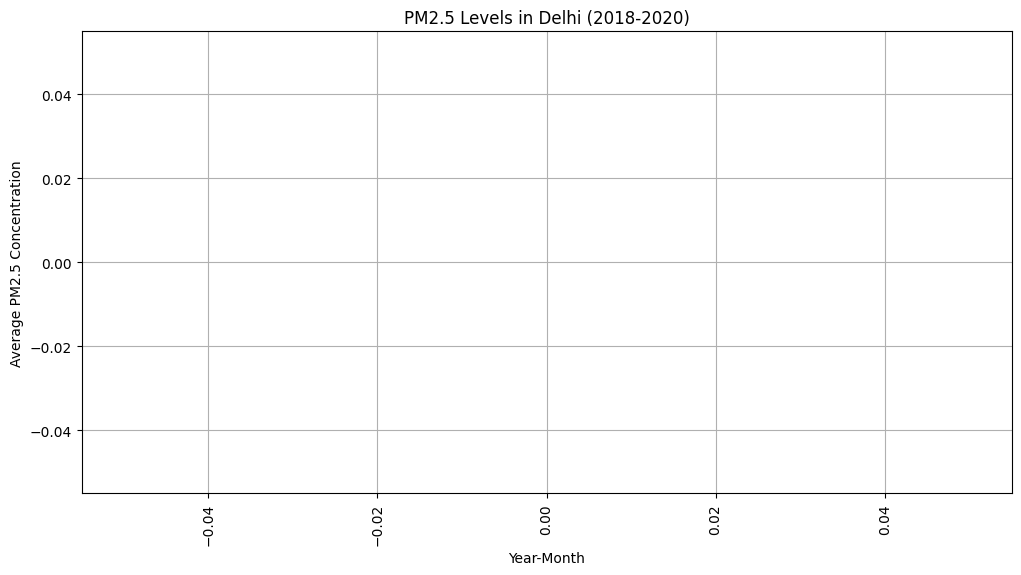

In [65]:
#Question 2

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_delhi = df[(df['state'] == 'Delhi') & (df['Timestamp'].dt.year.isin([2018, 2019, 2020]))]

# Extract month and year
df_delhi['Year-Month'] = df_delhi['Timestamp'].dt.to_period('M')

# Aggregate average PM2.5 concentration per month
delhi_monthly_pollution = df_delhi.groupby('Year-Month')['PM2.5'].mean().reset_index()
delhi_monthly_pollution['Year-Month'] = delhi_monthly_pollution['Year-Month'].astype(str)

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(delhi_monthly_pollution['Year-Month'], delhi_monthly_pollution['PM2.5'], marker='o', linestyle='-', color='blue')
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Average PM2.5 Concentration')
plt.title('PM2.5 Levels in Delhi (2018-2020)')
plt.grid(True)

# Mark Diwali (October-November) and New Year (January) pollution spikes
diwali_months = ['2018-10', '2018-11', '2019-10', '2019-11', '2020-10', '2020-11']
new_year_months = ['2019-01', '2020-01']

di2 = delhi_monthly_pollution[delhi_monthly_pollution['Year-Month'].isin(diwali_months)]
ny2 = delhi_monthly_pollution[delhi_monthly_pollution['Year-Month'].isin(new_year_months)]

for i, row in di2.iterrows():
    plt.annotate('Diwali', (row['Year-Month'], row['PM2.5']), textcoords="offset points", xytext=(0,10), ha='center', arrowprops=dict(facecolor='red', arrowstyle='->'))

for i, row in ny2.iterrows():
    plt.annotate('New Year', (row['Year-Month'], row['PM2.5']), textcoords="offset points", xytext=(0,10), ha='center', arrowprops=dict(facecolor='green', arrowstyle='->'))

plt.show()

In [ ]:
# Miscellaneous questions

#question 3

df = pd.read_csv("Data.csv", parse_dates=["Timestamp"])
ncap = pd.read_csv("NCAP_Funding.csv")

# Convert funding values to numeric and handle missing values
ncap["Amount released during FY 2020-21"] = pd.to_numeric(ncap["Amount released during FY 2020-21"], errors="coerce").fillna(0)

# Identify the state with the highest NCAP funding in 2020
top_state = ncap.loc[ncap["Amount released during FY 2020-21"].idxmax(), "State"]
top_funding = ncap["Amount released during FY 2020-21"].max()

print(f"State with highest NCAP funding in 2020: {top_state} (₹{top_funding})")

# Filter PM2.5 data for that state
df_state = df[df["state"] == top_state].copy()

# Extract year
df_state["year"] = df_state["Timestamp"].dt.year

# Compute yearly average PM2.5 levels (2019-2023)
pm25_trend = df_state.groupby("year")["PM2.5"].mean()

# Plot the PM2.5 trend
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(pm25_trend.index, pm25_trend, marker="o", linestyle="-", color="red", label=f"PM2.5 Levels in {top_state}")

# Labels and title
ax.set_title(f"PM2.5 Levels in {top_state} (2019-2023) vs NCAP Funding", fontsize=14)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Average PM2.5 (µg/m³)", fontsize=12)

# Highlight funding year
ax.axvline(x=2020, color="blue", linestyle="--", alpha=0.7, label="NCAP Funding Year (2020)")

# Adding legend
ax.legend()

# Adding grid
ax.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()

In [ ]:
#question 4

import geopandas as gpd

# Load air quality dataset
df = pd.read_csv("Data.csv")

# Extract required columns (station, latitude, longitude, state)
df = df[["station", "latitude", "longitude", "state"]].dropna()

# Load India map (Natural Earth dataset)
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Extract India from world map
india = world[world.name == "India"]

# Convert data to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["longitude"], df["latitude"]))

# Plot India map
fig, ax = plt.subplots(figsize=(10, 8))
india.plot(ax=ax, color="lightgray", edgecolor="black")

# Plot sensor locations
gdf.plot(ax=ax, markersize=10, color="red", alpha=0.6, label="Sensor Locations")

# Customize plot
ax.set_title("Air Quality Monitoring Stations in India", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

plt.show()

In [ ]:
#Tell us something new
#Correlation between PM2.5 levels and funding: You could explore if there's any correlation between the amount of funding released to specific states or cities (from the NCAP) and improvements in air quality. For example, checking whether states with higher funding saw a reduction in PM2.5 levels over time could provide useful insights for future funding decisions.